<a href="https://colab.research.google.com/github/toot09/Python-Data_Analysis-and-Image-Processing-Tutorial/blob/master/14.%20OpenCV%20Contours%20%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt
import numpy as np

uploaded = files.upload()

Saving digit_image.png to digit_image.png


cv2.boundingRect(contour): Contour를 포함하는 사각형을 그립니다.

 * 사각형의 X, Y 좌표와 너비, 높이를 반환합니다

<function matplotlib.pyplot.show>

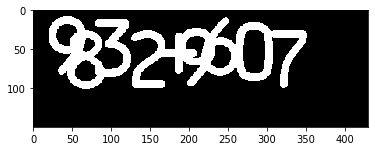

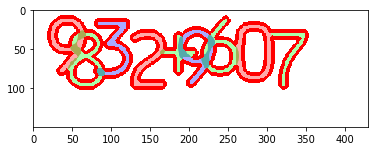

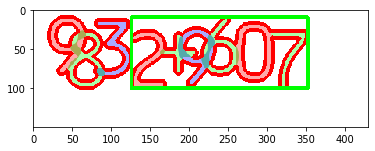

In [38]:
image = cv2.imread("digit_image.png")
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_, thre = cv2.threshold(image_gray,230,255,0)
#plt.imshow(cv2.cvtColor(thre,cv2.COLOR_BGR2RGB))

# bit비교 (백:1 흑:0)
# 1) cv2.bitwise_and
# 2) cv2.bitwise_or
# 3) cv2.bitwise_not -> 반전
# 4) cv2.bitwise_xor
thre = cv2.bitwise_not(thre)

#contour,_ = cv2.findContours(thre,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour,hierarchy = cv2.findContours(thre,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(image, contours, -1, (0,0,255),4 )

plt.figure(1)
plt.imshow(cv2.cvtColor(thre,cv2.COLOR_BGR2RGB))
plt.show

plt.figure(2)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show

cnt = contour[0]
x,y,w,h = cv2.boundingRect(cnt)
image = cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),3)

plt.figure(3)
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show

cv2.convexHull(contour): Convex Hull 알고리즘으로 외곽을 구하는 함수

 * 대략적인 형태의 Contour 외곽을 빠르게 구할 수 있습니다. (단일 Contour 반환)

<function matplotlib.pyplot.show>

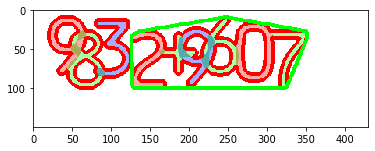

In [87]:
#cv2.findContours(thre,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img = cv2.imread("digit_image.png")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

_,thre = cv2.threshold(img_gray,230,255,0)
thre = cv2.bitwise_not(thre)

contour, hierarchy= cv2.findContours(thre, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img, contour,-1,(0,0,255),3)

hull = cv2.convexHull(contour[0])
img = cv2.drawContours(img, [hull], -1, (0,255,0), 3)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show



cv2.approxPolyDP(curve, epsilon, closed): 근사치 Contour를 구합니다.

 1. curve: Contour
 2. epsilon: 최대 거리 (클수록 Point 개수 감소)
 3. closed: 폐곡선 여부